# Machine Learning for Targeted Advertising : A Case Study For Social Network Ads.

This notebook includes analyzing data related to social network ads, identifying patterns and relationships, and building a predictive model to identify the target audience that is most likely to respond positively to the ads.


My approach is as follows:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Model Evaluation

# 1. Problem Definition

How we can use various python based Machine Learning Models to predict the if a product will be purchased from ad shown on social network?


# 2. Data

Data set from: https://www.kaggle.com/d4rklucif3r/social-network-ads

The Dataset used in these models tells about whether a person of certain age having certain income purchases a product or not.
We need to predict whether a targeted audience will purchase the product or not.

# 3. Evaluation

I will be using various classification metrics like accuracy, precision, recall, F1-score and support to evaluate my model.

# 4. Features

## Input /  Features
    1. Age - Age of the Person
    2. EstimatedSalary - Estimated Salary of Person

## Output / Label
    3. PurchasedItem - Purchased or Not

## Standard Imports

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

## Model Imports

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [71]:
# local
df = pd.read_csv('Social_Media_Ads.csv')


## Data Exporation

In [72]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [73]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [74]:
df.shape

(400, 3)

The dataset has 400 records each have 2 features(age of a person, estimated annual salary of a person) and 1 target label(whether the person purchased the product or not).

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


There are no null values in any of the columns of the datatframe. Additionally, all the attributes are of type int64.

In [76]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Some of the statistical insights of the dataset are as follows:
- There aren't any missing values in the dataset.
- The mean age is 38, estimated average salary is \\$69742.500 and the purchase value is 0.36 : This suggests that the average customer in the dataset is **middle-aged with an above average salary** and the **majority of customers didn't make the purchase**.
- The standard deviation of age is 10.48, of salary is \\$34096.96 and the purchase value is 0.48, suggesting a broad range of ages(**18-60**) and salaries(**\\$15000 - \\$150000**) amongst the customer base with a variability in the purchasing decision of the customers.
- **25%** of customers are relatively **young**, have **lower salaries** and **did not make the purchase**.
- **25%** of customers are are relatively **older**, have **higher salaries** and **purchased the product.**
- **50%** of customer base is **below the age of 37**, have a **salary lower than \\$70000** and **did not make the purchase.**

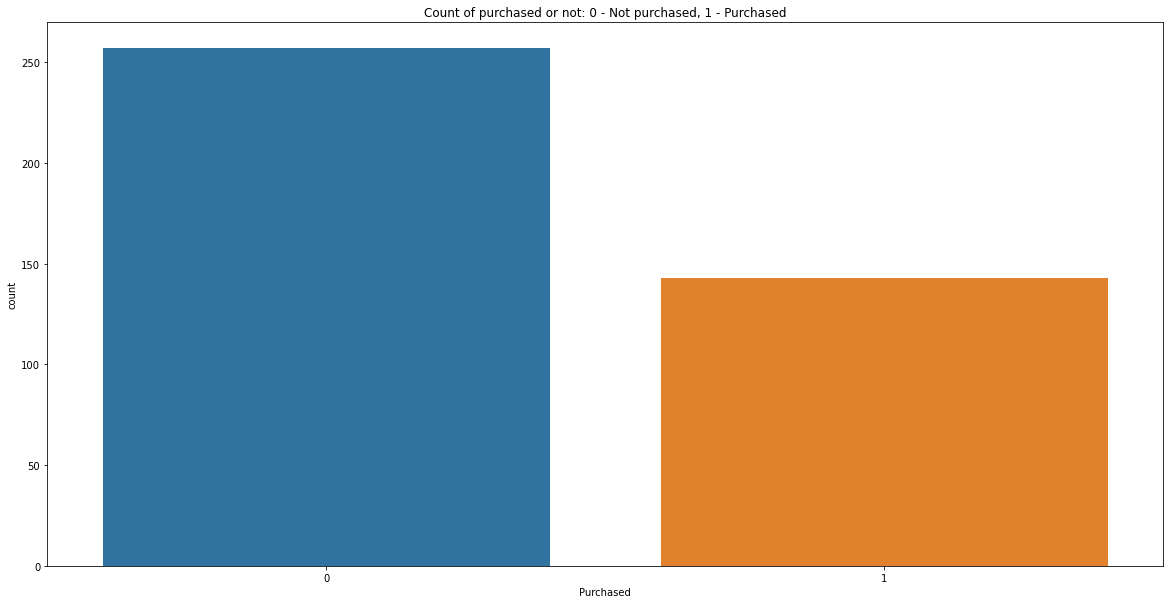

In [77]:
plt.figure(figsize=(20,10))
plt.title('Count of purchased or not: 0 - Not purchased, 1 - Purchased')
sns.countplot(data=df,x='Purchased');

250 customers did not make a purchase while 150 customers purchased the product.

This indicates that there is an imbalance in the data, where the majority of the customers did not make a purchase. This imbalance may be addressed during modeling in order to avoid bias towards the majority class.

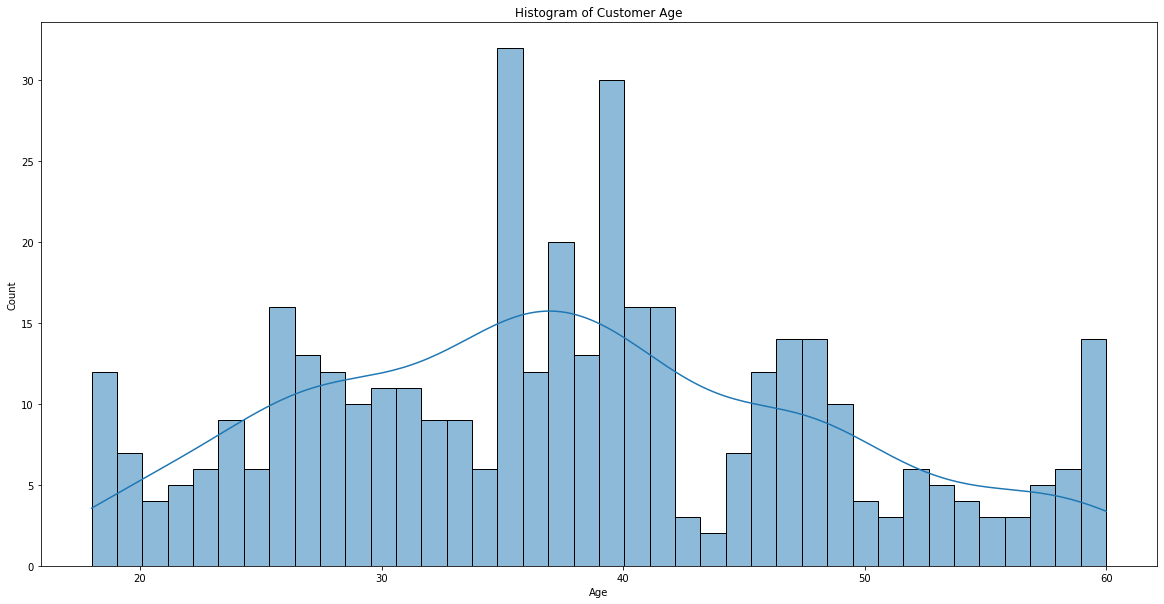

In [78]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Customer Age')
sns.histplot(data=df,x='Age',bins=40, kde=True);

The kernel density estimation plot on top of the histogram is a way to estimate the probability density function of the Age distribution.

The distribution of age is not perfectly symmetrical or unimodal. In fact, it appears to be slightly right-skewed, which in simple words means that there are more customers who are young than old. Additionally, there seems to be two peaks, one at 30-35 and one at 40-45 making it bimodal.

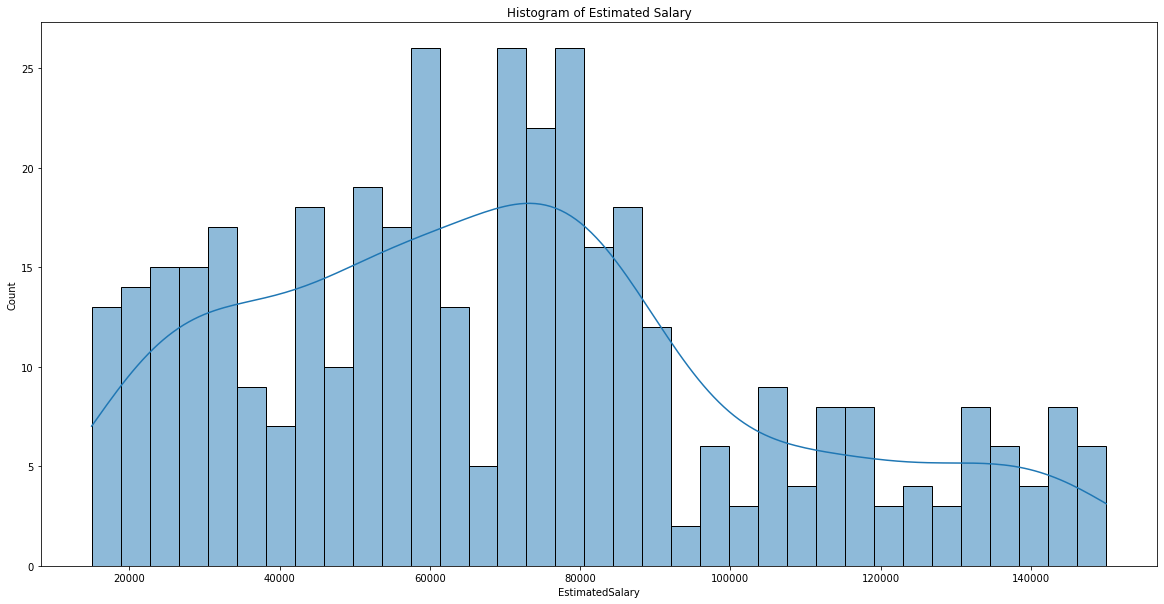

In [79]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Estimated Salary')
sns.histplot(data=df,x='EstimatedSalary',bins=35, kde=True);

The salary distribution also is slightly skewed to the right hand side.
- The peak of the histogram is around 50,000 to 80,0000.
- There are some high salary values at the right end of the plot that are far from the rest of the data, indicating potential outliers


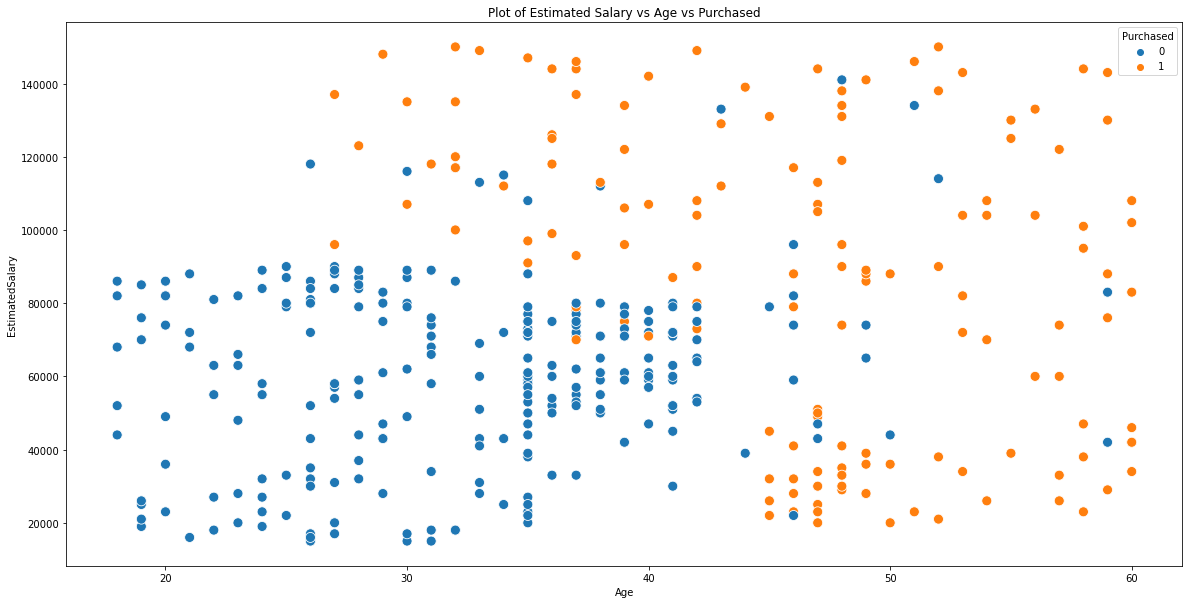

In [80]:
plt.figure(figsize=(20,10))
plt.title('Plot of Estimated Salary vs Age vs Purchased')
sns.scatterplot(data=df,x='Age',y= 'EstimatedSalary', hue='Purchased', s=100);

The scatterplot shows the relationship between **Age and Estimated Salary**, with the color indicating whether the individual purchased the product or not.
- The non-purchased points are relatively more spread out across both age and Estimated Salary, with a concentration of non-purchased points in the lower Estimated Salary range.
- The plot suggests that individuals who purchased the product are generally older, with a concentration of purchased points in the higher age range.
    - Additionally, the plot shows that individuals who purchased the product have a wide range of Estimated Salary values, both higher and lower.

- The plot suggests that **age and estimated salary are important factors that influence on individual purchase decisions** of a product.





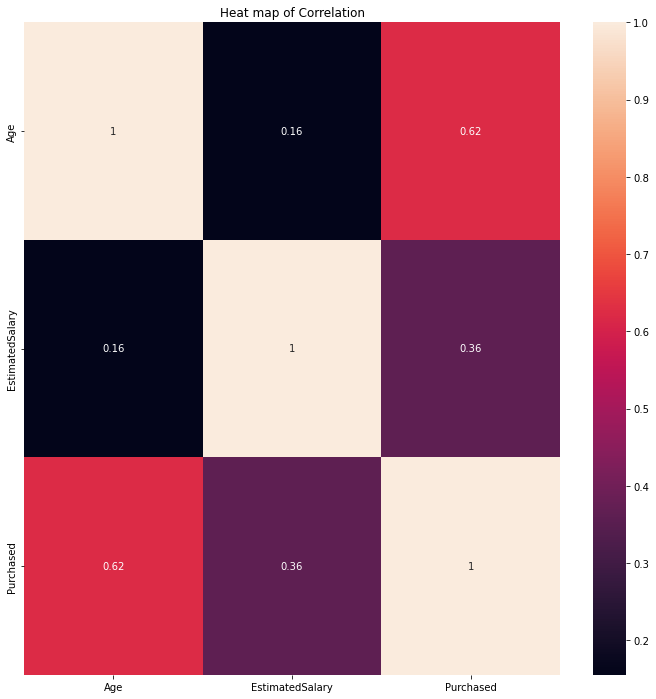

In [81]:
plt.figure(figsize=(12,12))
plt.title('Heat map of Correlation')
sns.heatmap(data=df.corr(), annot= True);

- The correlation coefficient of 0.62 indicates a **moderate positive correlation** between Age and Purchased.
    - This means that as Age increases, there is a tendency for the individual to make a purchase.
- The correlation coefficient between EstimatedSalary and Purchased is 0.36, indicating a **relatively weaker positive correlation**.
    - This means that there is a tendency for individuals with higher estimated salaries to make a purchase, but the relationship is not as strong as that between Age and Purchased.
- There is little correlation between Age and EstimatedSalary with a correlation coefficient of 0.16, which means that there is **no strong relationship between the two variables- Age and EstimatedSalary**.


# 5. Modelling

In [82]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [83]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

X is a dataframe that contains the input features or independent variables of the model. It is created by dropping the Purchased column from the original dataframe df using the drop() function along the axis=1 (alonbg the columns).

y is a series that contains the target variable or dependent variable of the model. It is created by selecting the Purchased column from the original dataframe df. This column represents whether or not a customer has purchased the product.

In [84]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

I am splitting the data into a ratio of 80:20 (20% of the data will be used for testing and 80% will be used for training). The random_state parameter is set to 42 to ensure that the random split is reproducible.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The resulting variables X_train, X_test, y_train, and y_test contain the training and testing sets of input features and output labels. These sets will be used to train and evaluate the performance of the machine learning model.

## Feature Scaling 

Feature scaling is generally necessary when there are significant differences in the scales of the features in a dataset. This can cause some machine learning algorithms to perform poorly or take longer to converge.

Since the range of the values of age and salary are large, it is very likely that feature scaling would be extremely beneficial. Additionally, the features age and salart have different units of measurement, therefore in such scenarios it is usually recommended to perform feature scaling to ensure each feature contributes equally to the analysis.

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Modeling

`A baseline model is a simple and basic model that we start with before we try to build more advanced and complex models in machine learning. We use this basic model as a reference point to compare and evaluate the performance of the advanced models that we build later. The baseline model helps us to set a minimum level of performance that other models must exceed to be considered useful.`

A baseline model may be something as simple as predicting the most common class for a classification problem, or the mean value for a regression problem. For example, in a binary classification problem with an imbalanced dataset where the majority class is 90% of the data, a baseline model that always predicts the majority class will have an accuracy of 90%. Therefore, any more advanced models must have an accuracy higher than 90% to be considered useful.

Baseline models are important because they provide a starting point for building and evaluating more complex models. They can help to identify if a more advanced model is actually improving the performance or if it is not much better than the baseline. Additionally, baseline models can be useful as a reference point for comparing the performance of different models or approaches.

In [87]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [88]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
          'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss')}

In [89]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [90]:
baseline_model_scores.sort_values('Score')

,Score
DecisionTreeClassifier,0.8375
LogisticRegression,0.8625
GradientBoostingClassifier,0.8625
RandomForestClassifier,0.8875
AdaBoostClassifier,0.8875
KNeighborsClassifier,0.9125
XGBClassifier,0.9125
SVC,0.9250
XGBRFClassifier,0.9250


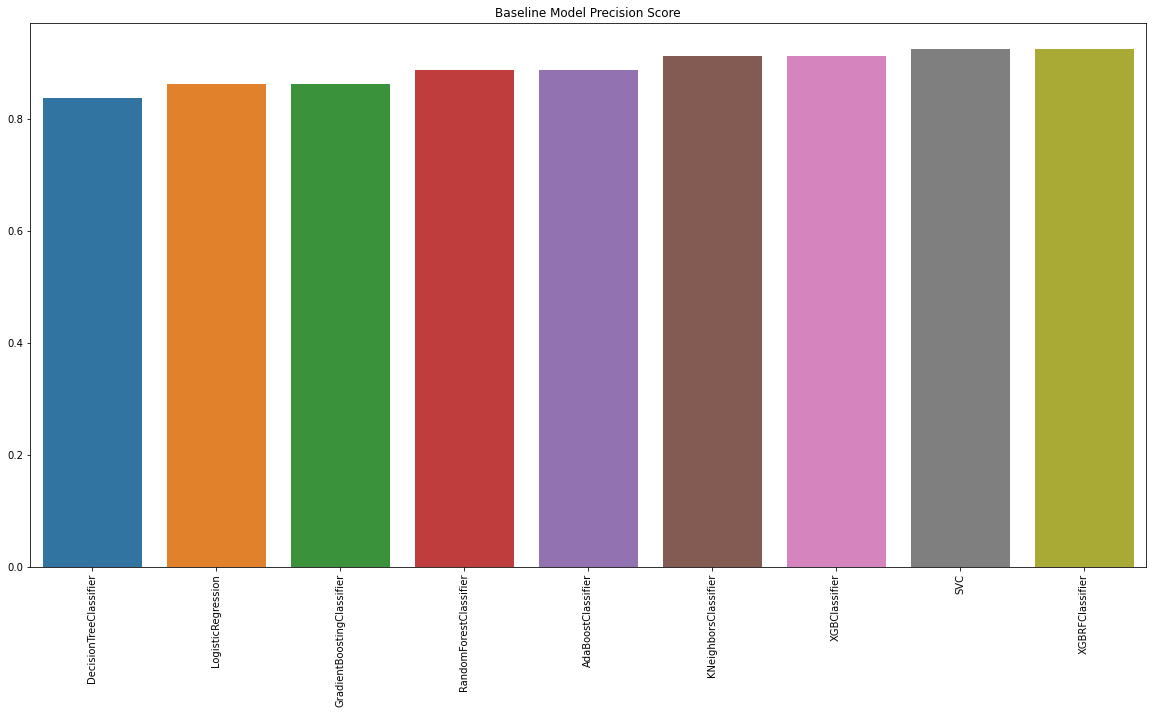

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90);

From the baseline modeling, I have chosen the following model to have an in-depth look:

1. KNeighborsClassifier 	0.9125
2. XGBClassifier 	0.9125
3. XGBRFClassifier 	0.9125
4. SVC 	0.9250

## HyperTuning using Random Search CV

Hyperparameter tuning using Random Search CV is a technique used to optimize the performance of a machine learning model by tuning its hyperparameters. Hyperparameters are parameters that are set prior to training a model and are not learned during training. They can have a significant impact on the model's performance, and finding the optimal values for these hyperparameters can improve the accuracy and generalizability of the model.

In [92]:
filterwarnings('ignore')

**Random Search CV** is a method of hyperparameter tuning that involves randomly selecting a set of hyperparameters from a search space and evaluating the model's performance using cross-validation. By repeating this process with different sets of hyperparameters, the optimal combination can be found.

In [93]:
def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                     param_distributions=params[name],
                                     cv=5,
                                     n_iter=20,
                                     verbose=1)
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

### RandomSearch CV 1

In [94]:
params = {'KNeighborsClassifier' : {'n_neighbors': np.arange(1,100,10)},
          'XGBClassifier': {'learning_rate': np.linspace(0,1,20),
                            'gamma': [0,2,4,10,20,50],
                            'max_depth': [2,3,6,10,20],
                            'lambda': [0,1],
                            'alpha' : [0,0.1,0.2,0.5,0.8,1],
                            },
          'XGBRFClassifier': {'learning_rate': np.linspace(0,1,20),
                              'max_depth': [2,3,6,10,20],
                              },
          'SVC' : {'C': [0.1,0.5,1, 10,100,500], 
                   'kernel':['linear', 'poly', 'rbf','sigmoid'],
                   'gamma':['scale','auto'],
                   'degree':[2,3,4,5,6,7]}
          }
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
         'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss'),
         'SVC': SVC()
         }

In [95]:
model_rs_scores_1, model_rs_best_param_1 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [96]:
model_rs_scores_1


{'KNeighborsClassifier': 0.925,
 'XGBClassifier': 0.9125,
 'XGBRFClassifier': 0.9125,
 'SVC': 0.9375}

In [97]:
model_rs_best_param_1

{'KNeighborsClassifier': {'n_neighbors': 11},
 'XGBClassifier': {'max_depth': 2,
  'learning_rate': 0.631578947368421,
  'lambda': 0,
  'gamma': 20,
  'alpha': 0},
 'XGBRFClassifier': {'max_depth': 2, 'learning_rate': 0.47368421052631576},
 'SVC': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 7, 'C': 0.5}}

## RandomSearch CV 2

In [98]:
params = {'KNeighborsClassifier' : {'n_neighbors': np.arange(1,15)},
          'XGBClassifier': {'learning_rate': [0.631578947368421],
                            'gamma': [15,20,25],
                            'max_depth': [2],
                            'lambda': [0,1],
                            'alpha' : [0],
                            },
          'XGBRFClassifier': {'learning_rate': [0.47368421052631576],
                              'max_depth': [2],
                              },
          'SVC' : {'C': [0.3,0.4,0.5,0.6,0.7], 
                   'kernel':['rbf'],
                   'gamma':['scale'],
                   'degree':[7,8,9,10,15,20]}
          }
models = {'KNeighborsClassifier': KNeighborsClassifier(),
         'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
         'XGBRFClassifier': XGBRFClassifier(eval_metric='mlogloss'),
         'SVC': SVC()
         }

In [99]:
model_rs_scores_2, model_rs_best_param_2 = randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [100]:
model_rs_scores_2

{'KNeighborsClassifier': 0.9375,
 'XGBClassifier': 0.9125,
 'XGBRFClassifier': 0.9125,
 'SVC': 0.925}

In [101]:
model_rs_best_param_2

{'KNeighborsClassifier': {'n_neighbors': 9},
 'XGBClassifier': {'max_depth': 2,
  'learning_rate': 0.631578947368421,
  'lambda': 0,
  'gamma': 15,
  'alpha': 0},
 'XGBRFClassifier': {'max_depth': 2, 'learning_rate': 0.47368421052631576},
 'SVC': {'kernel': 'rbf', 'gamma': 'scale', 'degree': 20, 'C': 0.6}}

# 6. Evaluating Models

In [102]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

## Classification Report

In [103]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



The classification report provides an evaluation of a binary classification model's performance on a test set. The report is divided into three main sections: precision, recall, and f1-score, along with the support (number of observations) for each class.

The **precision** for a class is the proportion of true positives among all the positive predictions for that class. In this case, the precision for class 0 is 0.98, which means that when the model predicts that an observation belongs to class 0, it is correct 98% of the time. The precision for class 1 is 0.87, which means that when the model predicts that an observation belongs to class 1, it is correct 87% of the time.

The **recall** for a class is the proportion of true positives among all the actual observations of that class. In this case, the recall for class 0 is 0.92, which means that the model correctly identifies 92% of all the observations in class 0. The recall for class 1 is 0.96, which means that the model correctly identifies 96% of all the observations in class 1.

The **f1-score** is the harmonic mean of the precision and recall for a class, and it provides a balanced measure of the model's performance. The f1-score for class 0 is 0.95, and for class 1 it is 0.92.

**The accuracy is the proportion of correct predictions over all the predictions made by the model, and it is 0.94 in this case.**

The macro avg is the unweighted average of the precision, recall, and f1-score for both classes. In this case, it is 0.93, which means that the overall performance of the model is quite good.

The weighted avg is the weighted average of the precision, recall, and f1-score for both classes, weighted by the number of observations in each class. In this case, it is also 0.94, which indicates that the model is performing well for both classes.

## Confusion Matrix

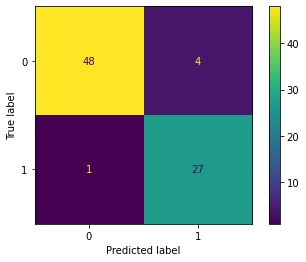

In [104]:
plot_confusion_matrix(model, X_test, y_test);

The confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each class in the prediction. In this case, the confusion matrix is showing the performance of a binary classification model with two classes: 0 and 1.

For class 0, the model correctly predicted 48 out of 52 instances, resulting in 1 false negatives. For class 1, the model correctly predicted 27 out of 28 instances, resulting in 1 false negative. The false positives are also shown in the confusion matrix, with 4 instances of class 0 being incorrectly predicted as class 1.

Overall, the confusion matrix shows that the model has a good performance in predicting both classes, with a higher accuracy for class 0. However, there is still some room for improvement as indicated by the false positive values.

## ROC Curve

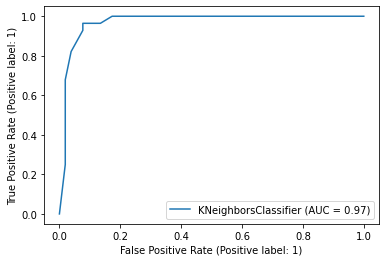

In [105]:
plot_roc_curve(model, X_test,y_test);

Based on the ROC curve for your dataset, the model seems to have good predictive power. 

The curve is close to the top left corner of the plot, which indicates a high true positive rate and a low false positive rate. 

- The **AUC score of 0.97 is also very high**, which further confirms that the model is good at distinguishing between the positive and negative classes. 
    - In other words, the model has a high probability of correctly identifying the positive instances and a low probability of misclassifying the negative instances. 
    
    
Overall, the ROC curve and AUC score suggest that the model has good performance for your dataset.

#### The KNeigborsClassifier model is the best one performing at 94% accuracy and it also performs better than the baseline models.